<a href="https://colab.research.google.com/github/anuragal/deep-learning/blob/master/S12/Assignment_A/tinyimagenet_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! git clone https://github.com/anuragal/deep-learning deep_learning
# ! ls 'deep_learning/tiny-imagenet-200/'

In [2]:
# ! cd 'deep_learning' && git pull

## Model

In [3]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#Load Resnet18
model = models.resnet18()

#Finetune Final few layers to adjust for tiny imagenet input
model.avgpool = nn.AdaptiveAvgPool2d(1)
model.fc.out_features = 200
model = model.to(device)

summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [

## Run the Model

In [4]:
%matplotlib inline

In [ ]:
import torch.nn as nn

from deep_learning.S12.Assignment_A.dataloader import ImageData
from deep_learning.S12.Assignment_A.datamodel import DataModel
from deep_learning.S12.Assignment_A.optimizer import OptimizerFactory

from torch.optim.lr_scheduler import OneCycleLR

dataset_path = 'deep_learning/tiny-imagenet-200/'
# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load_TINY_IMAGENET(dataset_path, "albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.15, momentum=0.9, weight_decay=1e-4)

dm = DataModel(img_data, criterion, optimizer, None, num_of_epochs = 50, cal_misclassified = True)

### Find LR Max

In [6]:
lr = dm.find_lr_max(model, device)

### LR Max

In [13]:
print(lr)

0.19823



## Run Model

In [8]:
dm.optimizer = optim_sgd.load(params=model.parameters(), lr=lr/10, momentum=0.9, weight_decay=0.0005)

# training the dataset and then running test
scheduler = OneCycleLR(dm.optimizer, 
                       max_lr=lr, 
                       epochs=50, 
                       steps_per_epoch = len(img_data.trainloader), 
                       div_factor=9,
                       final_div_factor=10,
                       pct_start=0.6
                       )
dm.schedular = scheduler
dm.run_model(model, device)

  0%|          | 0/602 [00:00<?, ?it/s]


EPOCH: 1


Loss=4.546386241912842 Batch_id=601 Accuracy=4.15: 100%|██████████| 602/602 [01:02<00:00,  9.62it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 3033/33000 (9.19%)

Learning Rate: 0.002271

EPOCH: 2


Loss=3.978684425354004 Batch_id=601 Accuracy=11.95: 100%|██████████| 602/602 [01:02<00:00,  9.60it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 4642/33000 (14.07%)

Learning Rate: 0.002416

EPOCH: 3


Loss=3.462672233581543 Batch_id=601 Accuracy=17.99: 100%|██████████| 602/602 [01:02<00:00,  9.57it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 6299/33000 (19.09%)

Learning Rate: 0.002657

EPOCH: 4


Loss=3.6345748901367188 Batch_id=601 Accuracy=22.02: 100%|██████████| 602/602 [01:02<00:00,  9.61it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 7101/33000 (21.52%)

Learning Rate: 0.002991

EPOCH: 5


Loss=3.0325770378112793 Batch_id=601 Accuracy=25.38: 100%|██████████| 602/602 [01:03<00:00,  9.55it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 7976/33000 (24.17%)

Learning Rate: 0.003413

EPOCH: 6


Loss=3.1235225200653076 Batch_id=601 Accuracy=28.41: 100%|██████████| 602/602 [01:02<00:00,  9.66it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 8874/33000 (26.89%)

Learning Rate: 0.003920

EPOCH: 7


Loss=2.8987104892730713 Batch_id=601 Accuracy=30.83: 100%|██████████| 602/602 [01:01<00:00,  9.72it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9151/33000 (27.73%)

Learning Rate: 0.004506

EPOCH: 8


Loss=2.6053266525268555 Batch_id=601 Accuracy=33.31: 100%|██████████| 602/602 [01:01<00:00,  9.72it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 9688/33000 (29.36%)

Learning Rate: 0.005164

EPOCH: 9


Loss=3.1122827529907227 Batch_id=601 Accuracy=35.37: 100%|██████████| 602/602 [01:02<00:00,  9.65it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9602/33000 (29.10%)

Learning Rate: 0.005887

EPOCH: 10


Loss=2.4633870124816895 Batch_id=601 Accuracy=37.75: 100%|██████████| 602/602 [01:02<00:00,  9.71it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 9850/33000 (29.85%)

Learning Rate: 0.006667

EPOCH: 11


Loss=2.562053680419922 Batch_id=601 Accuracy=40.21: 100%|██████████| 602/602 [01:01<00:00,  9.74it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 10349/33000 (31.36%)

Learning Rate: 0.007496

EPOCH: 12


Loss=2.6021792888641357 Batch_id=601 Accuracy=41.96: 100%|██████████| 602/602 [01:01<00:00,  9.79it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9955/33000 (30.17%)

Learning Rate: 0.008365

EPOCH: 13


Loss=2.659669876098633 Batch_id=601 Accuracy=44.36: 100%|██████████| 602/602 [01:02<00:00,  9.70it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 10735/33000 (32.53%)

Learning Rate: 0.009264

EPOCH: 14


Loss=2.0269453525543213 Batch_id=601 Accuracy=46.21: 100%|██████████| 602/602 [01:02<00:00,  9.65it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 10414/33000 (31.56%)

Learning Rate: 0.010183

EPOCH: 15


Loss=2.60357403755188 Batch_id=601 Accuracy=48.11: 100%|██████████| 602/602 [01:02<00:00,  9.63it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 10567/33000 (32.02%)

Learning Rate: 0.011112

EPOCH: 16


Loss=1.9881036281585693 Batch_id=601 Accuracy=50.31: 100%|██████████| 602/602 [01:02<00:00,  9.63it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 10917/33000 (33.08%)

Learning Rate: 0.012041

EPOCH: 17


Loss=2.098562002182007 Batch_id=601 Accuracy=52.30: 100%|██████████| 602/602 [01:02<00:00,  9.56it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 11454/33000 (34.71%)

Learning Rate: 0.012960

EPOCH: 18


Loss=2.1067638397216797 Batch_id=601 Accuracy=54.41: 100%|██████████| 602/602 [01:02<00:00,  9.70it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 11139/33000 (33.75%)

Learning Rate: 0.013859

EPOCH: 19


Loss=2.026186466217041 Batch_id=601 Accuracy=56.60: 100%|██████████| 602/602 [01:02<00:00,  9.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 11253/33000 (34.10%)

Learning Rate: 0.014727

EPOCH: 20


Loss=1.6938183307647705 Batch_id=601 Accuracy=58.52: 100%|██████████| 602/602 [01:02<00:00,  9.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 11546/33000 (34.99%)

Learning Rate: 0.015556

EPOCH: 21


Loss=1.6601824760437012 Batch_id=601 Accuracy=60.51: 100%|██████████| 602/602 [01:02<00:00,  9.63it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 11289/33000 (34.21%)

Learning Rate: 0.016337

EPOCH: 22


Loss=1.9473671913146973 Batch_id=601 Accuracy=62.32: 100%|██████████| 602/602 [01:02<00:00,  9.66it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 11364/33000 (34.44%)

Learning Rate: 0.017060

EPOCH: 23


Loss=1.5535629987716675 Batch_id=601 Accuracy=63.90: 100%|██████████| 602/602 [01:02<00:00,  9.63it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 11438/33000 (34.66%)

Learning Rate: 0.017718

EPOCH: 24


Loss=1.5421470403671265 Batch_id=601 Accuracy=65.75: 100%|██████████| 602/602 [01:02<00:00,  9.57it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 11459/33000 (34.72%)

Learning Rate: 0.018303

EPOCH: 25


Loss=1.5599513053894043 Batch_id=601 Accuracy=67.82: 100%|██████████| 602/602 [01:02<00:00,  9.65it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 11461/33000 (34.73%)

Learning Rate: 0.018810

EPOCH: 26


Loss=2.002431869506836 Batch_id=601 Accuracy=69.02: 100%|██████████| 602/602 [01:02<00:00,  9.57it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 10550/33000 (31.97%)

Learning Rate: 0.019232

EPOCH: 27


Loss=1.137186884880066 Batch_id=601 Accuracy=70.90: 100%|██████████| 602/602 [01:02<00:00,  9.64it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 11542/33000 (34.98%)

Learning Rate: 0.019565

EPOCH: 28


Loss=1.1591072082519531 Batch_id=601 Accuracy=72.22: 100%|██████████| 602/602 [01:02<00:00,  9.70it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 10794/33000 (32.71%)

Learning Rate: 0.019806

EPOCH: 29


Loss=1.2045917510986328 Batch_id=601 Accuracy=73.36: 100%|██████████| 602/602 [01:02<00:00,  9.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 11524/33000 (34.92%)

Learning Rate: 0.019951

EPOCH: 30


Loss=0.9218766093254089 Batch_id=601 Accuracy=74.87: 100%|██████████| 602/602 [01:03<00:00,  9.51it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 11350/33000 (34.39%)

Learning Rate: 0.020000

EPOCH: 31


Loss=1.2604092359542847 Batch_id=601 Accuracy=75.59: 100%|██████████| 602/602 [01:03<00:00,  9.55it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 11437/33000 (34.66%)

Learning Rate: 0.019878

EPOCH: 32


Loss=1.1268935203552246 Batch_id=601 Accuracy=77.72: 100%|██████████| 602/602 [01:03<00:00,  9.43it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 11504/33000 (34.86%)

Learning Rate: 0.019515

EPOCH: 33


Loss=0.7020725607872009 Batch_id=601 Accuracy=78.46: 100%|██████████| 602/602 [01:02<00:00,  9.60it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 11616/33000 (35.20%)

Learning Rate: 0.018921

EPOCH: 34


Loss=1.1234679222106934 Batch_id=601 Accuracy=79.91: 100%|██████████| 602/602 [01:02<00:00,  9.61it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 11189/33000 (33.91%)

Learning Rate: 0.018110

EPOCH: 35


Loss=0.7298186421394348 Batch_id=601 Accuracy=80.84: 100%|██████████| 602/602 [01:02<00:00,  9.61it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 11558/33000 (35.02%)

Learning Rate: 0.017102

EPOCH: 36


Loss=0.6700315475463867 Batch_id=601 Accuracy=82.61: 100%|██████████| 602/602 [01:03<00:00,  9.55it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 11565/33000 (35.05%)

Learning Rate: 0.015922

EPOCH: 37


Loss=0.6293774843215942 Batch_id=601 Accuracy=84.30: 100%|██████████| 602/602 [01:03<00:00,  9.55it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 11654/33000 (35.32%)

Learning Rate: 0.014598

EPOCH: 38


Loss=0.6813578009605408 Batch_id=601 Accuracy=86.21: 100%|██████████| 602/602 [01:02<00:00,  9.70it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0262, Accuracy: 11931/33000 (36.15%)

Learning Rate: 0.013164

EPOCH: 39


Loss=0.5855410695075989 Batch_id=601 Accuracy=87.64: 100%|██████████| 602/602 [01:02<00:00,  9.57it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 11798/33000 (35.75%)

Learning Rate: 0.011656

EPOCH: 40


Loss=0.5817197561264038 Batch_id=601 Accuracy=89.32: 100%|██████████| 602/602 [01:03<00:00,  9.52it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0256, Accuracy: 12379/33000 (37.51%)

Learning Rate: 0.010109

EPOCH: 41


Loss=0.358559250831604 Batch_id=601 Accuracy=91.60: 100%|██████████| 602/602 [01:03<00:00,  9.48it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 12365/33000 (37.47%)

Learning Rate: 0.008562

EPOCH: 42


Loss=0.414782851934433 Batch_id=601 Accuracy=93.84: 100%|██████████| 602/602 [01:02<00:00,  9.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 12505/33000 (37.89%)

Learning Rate: 0.007053

EPOCH: 43


Loss=0.24108944833278656 Batch_id=601 Accuracy=95.34: 100%|██████████| 602/602 [01:03<00:00,  9.55it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 12805/33000 (38.80%)

Learning Rate: 0.005619

EPOCH: 44


Loss=0.13792620599269867 Batch_id=601 Accuracy=96.75: 100%|██████████| 602/602 [01:02<00:00,  9.60it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 13033/33000 (39.49%)

Learning Rate: 0.004296

EPOCH: 45


Loss=0.14333204925060272 Batch_id=601 Accuracy=97.81: 100%|██████████| 602/602 [01:03<00:00,  9.48it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0243, Accuracy: 13304/33000 (40.32%)

Learning Rate: 0.003117

EPOCH: 46


Loss=0.055888399481773376 Batch_id=601 Accuracy=98.51: 100%|██████████| 602/602 [01:03<00:00,  9.49it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 13458/33000 (40.78%)

Learning Rate: 0.002109

EPOCH: 47


Loss=0.07128831744194031 Batch_id=601 Accuracy=98.89: 100%|██████████| 602/602 [01:02<00:00,  9.56it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 13603/33000 (41.22%)

Learning Rate: 0.001299

EPOCH: 48


Loss=0.07036713510751724 Batch_id=601 Accuracy=99.25: 100%|██████████| 602/602 [01:02<00:00,  9.56it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 13703/33000 (41.52%)

Learning Rate: 0.000705

EPOCH: 49


Loss=0.08465810865163803 Batch_id=601 Accuracy=99.32: 100%|██████████| 602/602 [01:02<00:00,  9.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 13708/33000 (41.54%)

Learning Rate: 0.000344

EPOCH: 50


Loss=0.03861750662326813 Batch_id=601 Accuracy=99.39: 100%|██████████| 602/602 [01:02<00:00,  9.59it/s]



Test set: Average loss: 0.0234, Accuracy: 13727/33000 (41.60%)

Learning Rate: 0.000222


## Plotting Test & Train Accuracy

[4.148051948051948, 11.95064935064935, 17.992207792207793, 22.02077922077922, 25.375324675324677, 28.412987012987013, 30.832467532467533, 33.31038961038961, 35.36623376623377, 37.749350649350646, 40.20519480519481, 41.96103896103896, 44.359740259740256, 46.20779220779221, 48.114285714285714, 50.31428571428572, 52.3025974025974, 54.41168831168831, 56.5987012987013, 58.515584415584414, 60.50779220779221, 62.323376623376625, 63.897402597402596, 65.75324675324676, 67.81948051948052, 69.02207792207793, 70.8961038961039, 72.21558441558442, 73.35584415584415, 74.87012987012987, 75.59220779220779, 77.71688311688311, 78.45974025974026, 79.90779220779221, 80.84285714285714, 82.6051948051948, 84.3, 86.2064935064935, 87.63766233766233, 89.31948051948052, 91.6025974025974, 93.83636363636364, 95.33506493506493, 96.75454545454545, 97.80909090909091, 98.51038961038961, 98.88701298701298, 99.24545454545455, 99.31558441558441, 99.3922077922078]
[9.190909090909091, 14.066666666666666, 19.087878787878786,

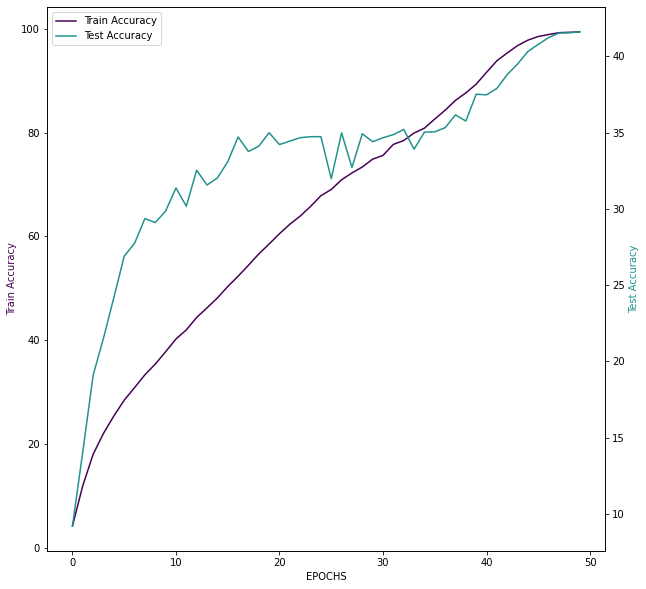

In [9]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

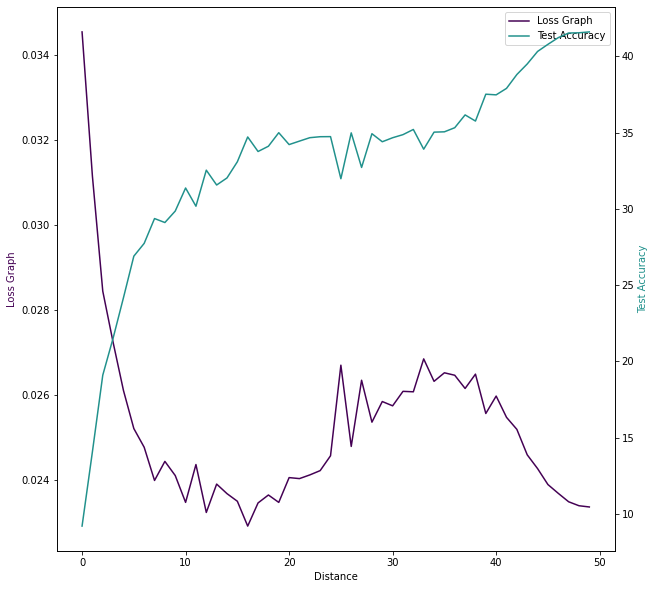

In [10]:
dm.plot_loss_accuracy()